In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt

## Leave-one-out analysis

In [15]:
# settings
data_column = 'relative_WIS'
geometric_mean = True
# load data
data = pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True)
# append number of peaks
data.loc[data['season'].isin(['2014-2015', '2015-2016', '2017-2018', '2023-2024']), 'peaks'] = 'one'
data.loc[data['season'].isin(['2016-2017', '2018-2019', '2019-2020', '2017-2018']), 'peaks'] = 'multiple' # double counting 2017-2018 because it is an edge case
# take geometric mean
if geometric_mean:
    print(data.groupby(by=['model', 'informed', 'use_ED_visits', 'peaks'])[data_column].apply(lambda x: gmean(x, axis=0)))
else:
    print(data.groupby(['model','informed', 'use_ED_visits', 'peaks'])[data_column].mean())

model                informed  use_ED_visits  peaks   
oneStrain            False     False          multiple    0.655627
                                              one         0.730718
                               True           multiple    0.619851
                                              one         0.591687
                     True      False          multiple    0.577233
                                              one         0.583613
                               True           multiple    0.573847
                                              one         0.553997
sequentialTwoStrain  False     False          multiple    0.687490
                                              one         0.771098
                               True           multiple    0.631592
                                              one         0.682155
                     True      False          multiple    0.586491
                                              one         0.634495
       

## Incremental calibration 2023-2024

In [12]:
# Relative WIS
data_column = 'relative_WIS'
data = pd.read_csv('accuracy-training-x.csv', parse_dates=True)
data = data.groupby(['model', 'training_horizon', 'use_ED_visits', 'season'])[data_column].apply(lambda x: gmean(x, axis=0))

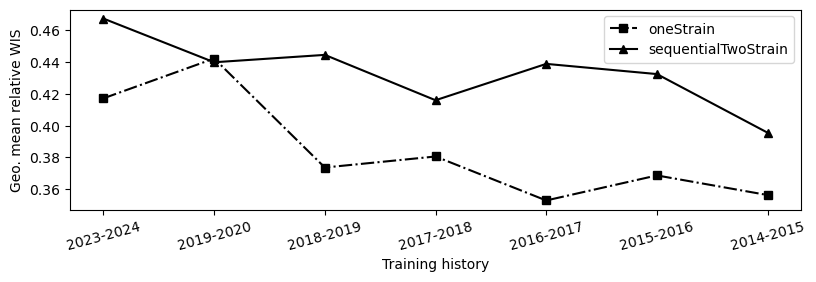

In [14]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
# oneStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['oneStrain'].values, linestyle='-.', marker='s', color='black', markersize=6, label='oneStrain')
# sequentialTwoStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['sequentialTwoStrain'].values, marker='^', color='black', markersize=6, label='sequentialTwoStrain')
# formatting
ax.set_xticks(data.index.get_level_values('training_horizon').unique())
ax.set_xticks(ax.get_xticks(), ['2023-2024', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015'], rotation=15, ha='center')
ax.set_xlabel('Training history')
ax.set_ylabel('Geo. mean relative WIS')
ax.legend()
plt.tight_layout()
plt.savefig('incremental-training.pdf')
plt.show()
plt.close()